In [6]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import math
import interactivecrop
from bs4 import BeautifulSoup

# Download the data

In [2]:
url = 'https://knowyourstuff.nz/pill-library/'

In [3]:
pill_data = requests.get(url=url)

In [4]:
# print(pill_data.content)

In [5]:
soup = BeautifulSoup(pill_data.content, 'html.parser')

In [13]:
tables = soup.find_all('table')

In [108]:
table = tables[0]
table_rows = table.find_all('tr')

res = []
for tr in table_rows[1:]:
    td = tr.find_all('td')
    #find the title
    if tr.find_all('b'):
        title = tr.find_all('b')[0].text
    elif tr.find_all('strong'):
        title = tr.find_all('strong')[0].text
    else:
        title = ''
        
    #find the url for the image
    if tr.find_all('img'):
        img_link = tr.find_all('img')[0]['data-large-file']
    else:
        img_link = ''
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    
    row.insert(0, title)
    row.insert(2, img_link)
    if row:
        res.append(row)


df = pd.DataFrame(res, columns=["Name", "Description", "Image"])
df


,Name,Description,Image
0,Green Louis Vuitton/Plugs,Green Louis Vuitton/Plugs\r\nLight green squar...,https://i0.wp.com/knowyourstuff.nz/wp-content/...
1,White Heisenberg,White Heisenberg\r\nWhite/speckled guy with a ...,https://i0.wp.com/knowyourstuff.nz/wp-content/...
2,Pink glittery heart,Pink glittery heart\r\nHot pink heart with gli...,https://i0.wp.com/knowyourstuff.nz/wp-content/...
3,Gold gram,Gold gram\r\nGold squareish shape with ‘1 gram...,https://i0.wp.com/knowyourstuff.nz/wp-content/...
4,Blue hexagon,Blue hexagonLight blue hexagon with a raised l...,https://i0.wp.com/knowyourstuff.nz/wp-content/...
5,Red Audi,Red AudiDark maroon-y red rectangle with Audi ...,https://i0.wp.com/knowyourstuff.nz/wp-content/...
6,Plain orange,Plain orangePeachy orange with bevelled edges ...,https://i0.wp.com/knowyourstuff.nz/wp-content/...
7,Yellow pimple,"Yellow pimpleYellow, round, with bevel on edge...",https://i0.wp.com/knowyourstuff.nz/wp-content/...
8,White Rolex,White RolexWhiteish colour with speckles. Role...,https://i0.wp.com/knowyourstuff.nz/wp-content/...
9,Yellow Mickey Mouse logo,Yellow Mickey Mouse logo\nWeight: 450-550mg\nE...,https://i0.wp.com/knowyourstuff.nz/wp-content/...


# Download the images

In [129]:
def download_img(name, link):
    
    response = requests.get(link)
    if response.status_code:
        name = name.replace('/', '_')
        fp = open(f'images/{name}.png', 'wb')
        fp.write(response.content)
        fp.close()

for row in range(0,len(df)):
    download_img(df['Name'][row], df['Image'][row])        

# Use InteractiveCrop to crop the images
- https://docs.opencv.org/2.4/doc/tutorials/imgproc/shapedescriptors/bounding_rects_circles/bounding_rects_circles.html



In [16]:
import glob

image_path_list = glob.glob("images/*.png")

def read_all_images():
    
    image_array_list = []
    image_path_list = image_path_list = glob.glob("images/*.png")
    for im in image_path_list:
        img = cv2.imread(im)
        image_array_list.append(img)
    return image_array_list

image_array_list = read_all_images()

In [121]:
from PIL import Image, ImageDraw, ImageFont

image_list = read_all_images()
image_name_list = [i.replace('images/', '') for i in image_path_list]

# Define the callback to save the image
def save_callback(image_name, im):

    im.draw() # Draw the shape onto the PIL image; Otherwise we print the unmodified image. Note draw() is inplace operator

    PIL_im = im.image # Access the PIL image from the 'shape' object
    d = ImageDraw.Draw(PIL_im)
    #read the original image
    image_original = Image.open(f'images/{image_name}')

    #grab the coordinates of the width and height start
    w_h = im.get_size()[0:2] 

    coords = (w_h[1], w_h[0], im.size[0] + im.size[2], w_h[1] + im.size[3])

    #crop the original image with the coords
    image_crop = image_original.crop(coords)

    image_crop = image_crop.resize((300,300))
    image_crop.show()
    image_crop.save('images/cropped/' + image_name)
    
crop(image_list, image_name_list = image_name_list, optimize = False, callback = save_callback)





GridBox(children=(Dropdown(description='Img Name:', layout=Layout(grid_area='im_selector', width='100%'), opti…

In [32]:
im = cv2.imread('images/Blue hexagon.png')

In [33]:
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
# imgray = cv2.blur(imgray,(15,15))
ret, thresh = cv2.threshold(imgray, math.floor(np.average(imgray)),
                            255,cv2.THRESH_BINARY_INV)
dilated = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10)))
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

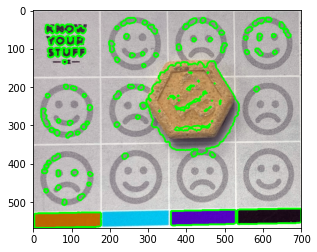

In [34]:
# im = np.expand_dims(im, axis=2).repeat(3, axis=2) 
for k, _ in enumerate(contours):
    im = cv2.drawContours(im, contours, -1, (0,255,0), 3)
plt.imshow(im)

In [117]:
im.shape

(568, 701, 3)

In [418]:
def detect_shape(c):
    # Compute perimeter of contour and perform contour approximation
    shape = ""
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)

    # Triangle
    if len(approx) == 3:
        shape = "triangle"

    # Square or rectangle
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)

        # A square will have an aspect ratio that is approximately
        # equal to one, otherwise, the shape is a rectangle
        shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"

    # Pentagon
    elif len(approx) == 5:
        shape = "pentagon"

    # Hexagon
    elif len(approx) == 6:
        shape = "hexagon"

    # Octagon 
    elif len(approx) == 8:
        shape = "octagon"

    # Star
    elif len(approx) == 10:
        shape = "star"

    # Otherwise assume as circle or oval
    else:
        shape = "circle"

    return (shape, peri, len(approx))

In [419]:
def get_contours_info(contours):
    contours_ranked = {}
    for c_n, c in enumerate(contours):
        # Identify shape
        shape, peri, corners = detect_shape(c)
        if shape != "rectanle":
            if peri>100:
#                 print(c_n, shape, peri)

                contour_info = {'index': c_n, 'shape': shape, 'size': peri, 'corners': corners}
                contours_ranked[c_n] = (contour_info)

    contours_ranked_df = pd.DataFrame.from_dict(contours_ranked, orient='index').sort_values(
                                            by='size', ascending=False)
    
    return contours_ranked_df
    
    

In [420]:
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#     imgray = cv2.blur(imgray, (15,15))
math.floor(np.average(imgray))

161

In [526]:
im = cv2.imread('images/Blue hexagon.png')
'Four Leaf Clover – green'
# im = cv2.imread('images/Givenchy – purple.png')

#pre crop the image to a slimmer version (image is almost always in near the centre)
#cut 100 each way

# im = im[0:400, 200:600]

def get_contours(im):

    imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#     imgray = cv2.blur(imgray, (15,15))
    # blur
    blur = cv2.GaussianBlur(imgray, (5,5), cv2.BORDER_DEFAULT)
    canny = cv2.Canny(blur, 100, 200)
#     ret, thresh = cv2.threshold(imgray, 170, 255, cv2.THRESH_BINARY_INV)

    # divide gray by morphology image
#     thresh = cv2.divide(imgray, smooth, scale=192)
    
    dilated = cv2.morphologyEx(canny, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20)))
    contours, hierarchy = cv2.findContours(dilated, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    return contours


contours = get_contours(im)
contours_ranked_df = get_contours_info(contours)
for k, _ in enumerate(contours):
    cnt_subset = contours[contours_ranked_df.reset_index()['index'][0]]
#     cnt_subset = contours
    cv2.drawContours(im, [cnt_subset], -1, (0,255,0), 3)
plt.imshow(im)

KeyError: 'size'

In [517]:
contours_ranked_df.reset_index()['index']

0      0
1      2
2      4
3      1
4      3
5     13
6     15
7     23
8     32
9     26
10    14
11     6
12    31
13    20
14    17
Name: index, dtype: int64

In [518]:
contours_ranked_df

,index,shape,size,corners
0,0,octagon,843.497474,8
2,2,rectangle,419.941125,4
4,4,rectangle,417.012193,4
1,1,rectangle,414.526911,4
3,3,rectangle,412.769552,4
13,13,star,206.124890,10
15,15,circle,192.409161,7
23,23,circle,176.710677,7
32,32,octagon,172.852812,8
26,26,octagon,170.124890,8


In [519]:
contours

(array([[[144, 526]],
 
        [[143, 527]],
 
        [[ 85, 527]],
 
        [[ 84, 528]],
 
        [[ 35, 528]],
 
        [[ 34, 529]],
 
        [[  3, 529]],
 
        [[  2, 530]],
 
        [[  2, 564]],
 
        [[  3, 565]],
 
        [[  2, 566]],
 
        [[  2, 567]],
 
        [[  2, 566]],
 
        [[  3, 565]],
 
        [[  2, 564]],
 
        [[  2, 531]],
 
        [[  4, 529]],
 
        [[ 34, 529]],
 
        [[ 35, 528]],
 
        [[ 84, 528]],
 
        [[ 85, 527]],
 
        [[143, 527]],
 
        [[144, 526]],
 
        [[174, 526]],
 
        [[175, 527]],
 
        [[175, 530]],
 
        [[176, 531]],
 
        [[175, 532]],
 
        [[175, 555]],
 
        [[176, 556]],
 
        [[176, 560]],
 
        [[175, 561]],
 
        [[175, 562]],
 
        [[174, 563]],
 
        [[173, 563]],
 
        [[172, 564]],
 
        [[170, 564]],
 
        [[169, 565]],
 
        [[166, 565]],
 
        [[165, 564]],
 
        [[160, 564]],
 
        [[159, 5